In [11]:
import uproot

In [26]:
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [8]:
fname = 'combine/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/MX_XXX_MY_YYY.root'

In [7]:
masses = [
    [450,300],
    [700,400],
    [900,600],
    [1200,300],
    [1200,500]
]

In [9]:
fnames = [fname.replace('XXX',str(m[0])).replace('YYY',str(m[1])) for m in masses]

In [38]:
f = uproot.open(fnames[1])
f.keys()
systematics = [val[7:].replace('Up;1','') for val in f.keys() if 'Up' in val]

In [39]:
systematics

['Trigger',
 'Pileup',
 'BTagHF',
 'BTagLF',
 'BTagHFStats1',
 'BTagHFStats2',
 'BTagLFStats1',
 'BTagLFStats2',
 'PUID',
 'JERpt',
 'bJER',
 'Absolute_2018',
 'Absolute',
 'BBEC1',
 'BBEC1_2018',
 'EC2',
 'EC2_2018',
 'FlavorQCD',
 'HF',
 'HF_2018',
 'RelativeBal',
 'RelativeSample_2018']

Trigger
Pileup
BTagHF
BTagLF
BTagHFStats1
BTagHFStats2
BTagLFStats1
BTagLFStats2
PUID
JERpt
bJER
Absolute_2018
Absolute
BBEC1
BBEC1_2018
EC2
EC2_2018
FlavorQCD
HF
HF_2018
RelativeBal
RelativeSample_2018


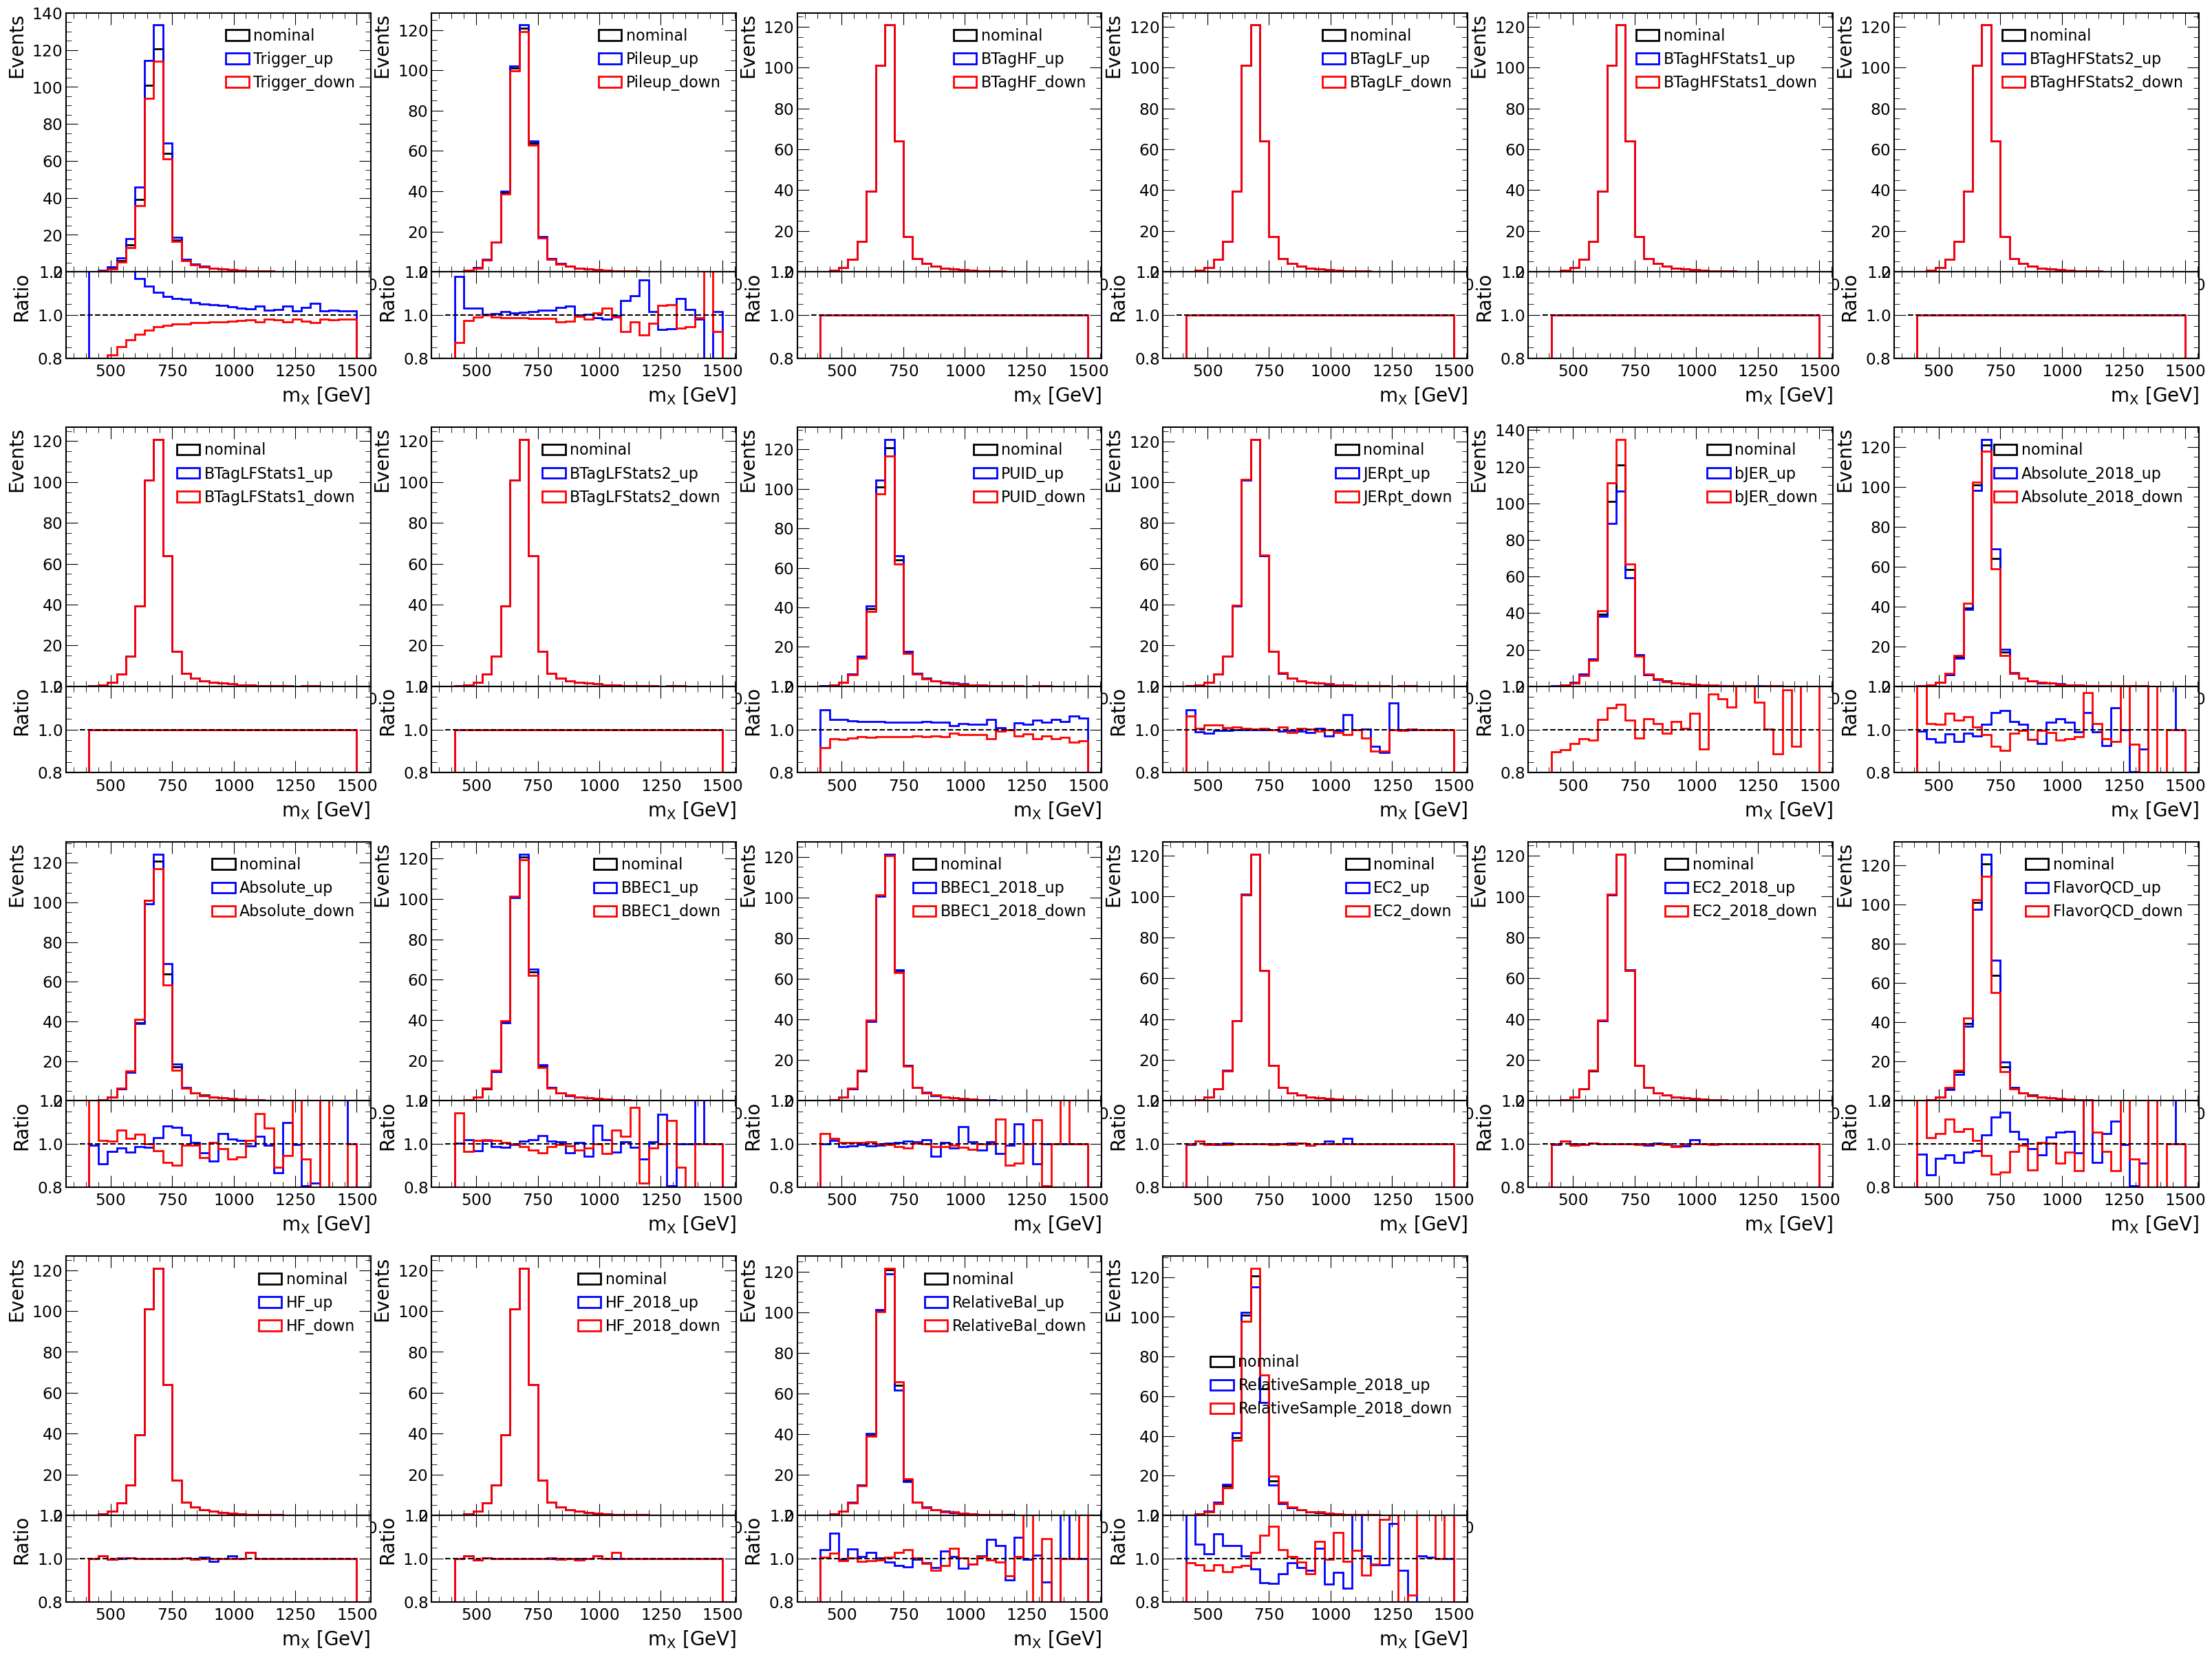

In [42]:
fig = plt.figure(figsize=(40,30))
gs = GridSpec(4, 6, figure=fig)

nom,e = f['signal'].to_numpy()
x = (e[1:]+e[:-1])/2

for sys,ss in zip(systematics, gs):
    print(sys)
    gs0 = GridSpecFromSubplotSpec(4, 1, subplot_spec=ss, hspace=0)

    ax1 = fig.add_subplot(gs0[:-1])
    ax2 = fig.add_subplot(gs0[-1], sharex=ax1)

    n_up = f[f'signal_{sys}Up'].to_numpy()[0]
    n_down = f[f'signal_{sys}Down'].to_numpy()[0]

    n = Hist(x, bins=e, weights=nom, ax=ax1, label='nominal', color='k')
    n_up = Hist(x, bins=e, weights=n_up, ax=ax1, label=f"{sys}_up", color='b')
    n_down = Hist(x, bins=e, weights=n_down, ax=ax1, label=f"{sys}_down", color='r')

    ratio_up = np.nan_to_num(n_up/n, 1.0)
    ratio_down = np.nan_to_num(n_down/n, 1.0)

    # print(n_ratio_up)

    n_ratio_up = Hist(x, bins=e, weights=ratio_up, ax=ax2, color='b')
    n_ratio_down = Hist(x, bins=e, weights=ratio_down, ax=ax2, color='r')
    ax2.plot([375,1500], [1,1], 'k--')
    ax2.set_ylim(0.8,1.2)
    ax2.set_ylabel('Ratio')
    ax2.set_xlabel(r'$m_{X}$ [GeV]')
    ax1.set_ylabel('Events')
    ax1.legend()

fig.savefig('updown.pdf', bbox_inches='tight')

# for ax,syst in zip(axs.flatten(),systematics):
    

#     Hist(x, weights=nom, bins=e, ax=ax, label='Nominal')
#     Hist(x, weights=n_up, bins=e, ax=ax, label=f'{syst}Up')
#     Hist(x, weights=n_down, bins=e, ax=ax, label=f'{syst}Down')
#     break

In [44]:
import matplotlib.gridspec as gridspec

Text(0, 1, 'Events')

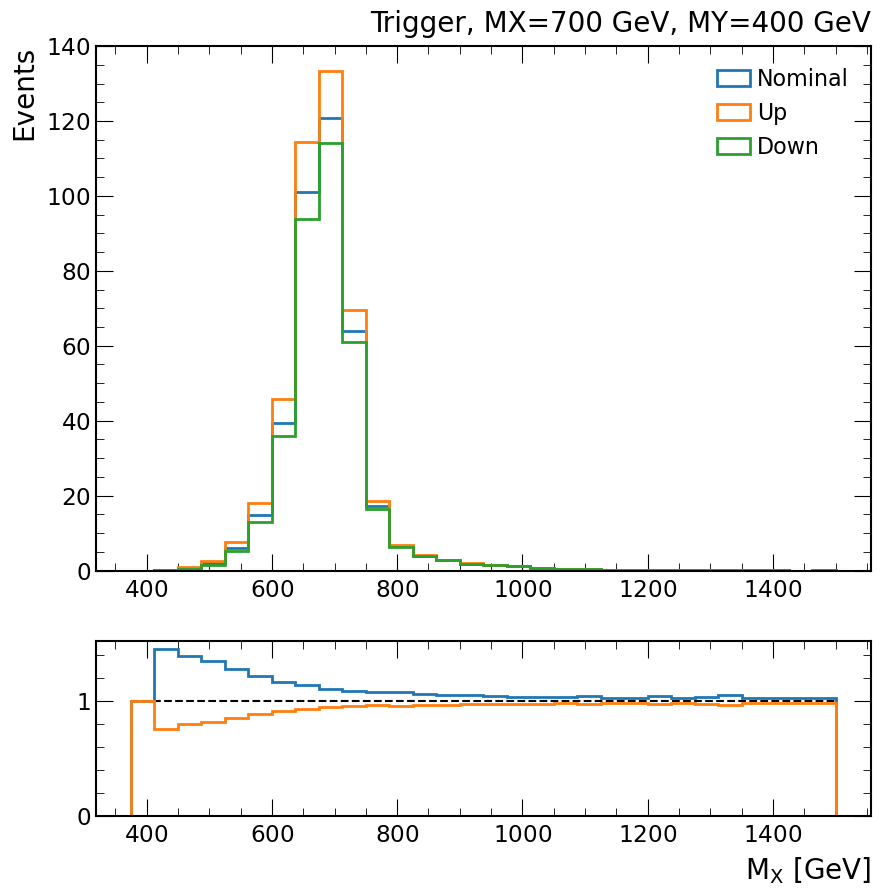

In [55]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 1, figure=fig, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

_, e = f['signal'].to_numpy()
n = Hist(x, weights=f['signal'].to_numpy()[0], bins=e, ax=ax1, label='Nominal')
n_up = Hist(x, weights=f['signal_TriggerUp;1'].to_numpy()[0], bins=e, ax=ax1, label='Up')
n_down = Hist(x, weights=f['signal_TriggerDown;1'].to_numpy()[0], bins=e, ax=ax1, label='Down')

ax2.plot([375,1500], [1,1], 'k--')
ratio_up, ratio_down = np.nan_to_num(n_up/n,nan=1), np.nan_to_num(n_down/n,nan=1)
n_ratioUp = Hist(x, weights=ratio_up, bins=e, ax=ax2)
n_ratioDown = Hist(x, weights=ratio_down, bins=e, ax=ax2)

ax1.set_title('Trigger, MX=700 GeV, MY=400 GeV')
ax2.set_xlabel(r'$M_{X}$ [GeV]')
ax1.set_ylabel('Events')

Text(0, 1, 'Events')

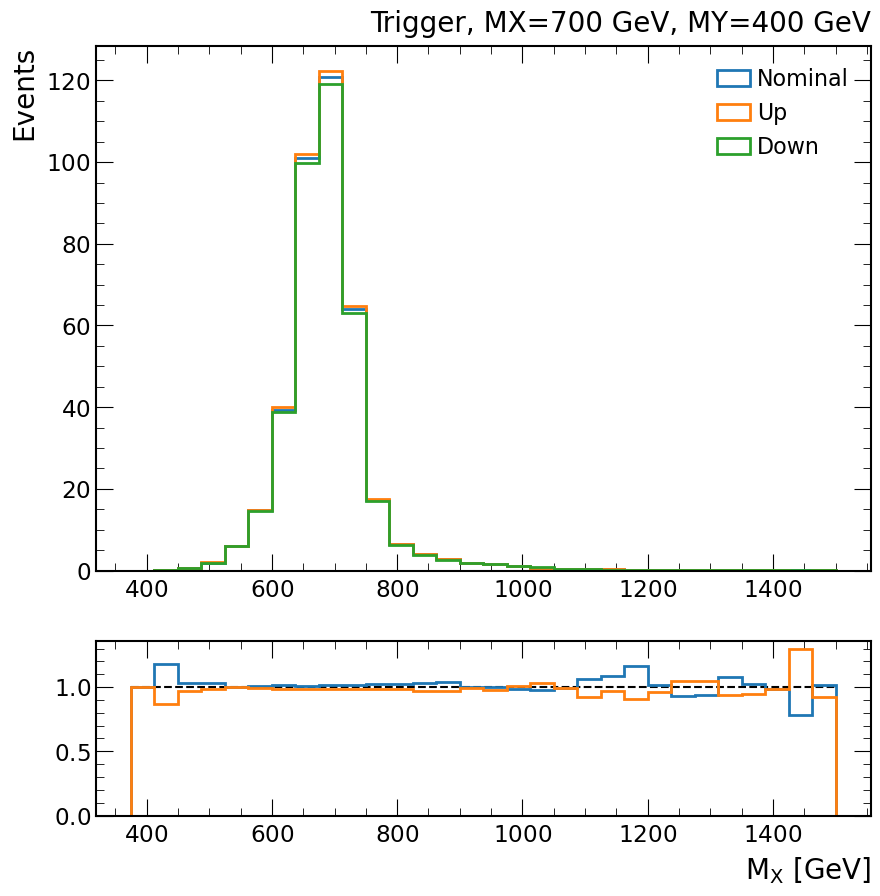

In [56]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 1, figure=fig, height_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

_, e = f['signal'].to_numpy()
n = Hist(x, weights=f['signal'].to_numpy()[0], bins=e, ax=ax1, label='Nominal')
n_up = Hist(x, weights=f['signal_PileupUp;1'].to_numpy()[0], bins=e, ax=ax1, label='Up')
n_down = Hist(x, weights=f['signal_PileupDown;1'].to_numpy()[0], bins=e, ax=ax1, label='Down')

ax2.plot([375,1500], [1,1], 'k--')
ratio_up, ratio_down = np.nan_to_num(n_up/n,nan=1), np.nan_to_num(n_down/n,nan=1)
n_ratioUp = Hist(x, weights=ratio_up, bins=e, ax=ax2)
n_ratioDown = Hist(x, weights=ratio_down, bins=e, ax=ax2)

ax1.set_title('Trigger, MX=700 GeV, MY=400 GeV')
ax2.set_xlabel(r'$M_{X}$ [GeV]')
ax1.set_ylabel('Events')

In [1]:
f_dir = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM'
mass_point = 'NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8'

model_dir = '/eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018'

In [6]:
import subprocess
output = subprocess.check_output(f'ls {model_dir}/NMSSM_XToYH*', shell=True).decode('utf-8').split('\n')
output = [out for out in output if 'eos' in out]
output[0]

'/eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root'

In [5]:
systematics = [out.split('/')[-1].split('_NMSSM')[0].split('_') for out in output]
# systematics = [['_'.join(sys[:-1]), sys[-1]] if len(sys) == 3 else sys for sys in systematics]
systematics[0]

['NMSSM',
 'XToYHTo6B',
 'MX-1000',
 'MY-250',
 'TuneCP5',
 '13TeV-madgraph-pythia8.root']

In [ ]:
sys_dict = {
    'Absolute_2018' : 'bSFshape_X_jesAbsolute',
    'Absolute' : 'bSFshape_X_jesAbsolute',
    'BBEC1_2018' : 'bSFshape_X_jesBBEC1',
    'BBEC1' : 'bSFshape_X_jesBBEC1',
    'EC2_2018' : 'bSFshape_X_jesEC2',
    'EC2' : 'bSFshape_X_jesEC2',
    'FlavorQCD' : 'bSFshape_X_jesFlavorQCD',
    'HF_2018' : 'bSFshape_X_jesHF',
    'HF' : 'bSFshape_X_jesHF',
    'RelativeBal' : 'bSFshape_X_jesRelativeBal',
    'RelativeSample_2018' : 'bSFshape_X_jesRelativeSample',
    'Trigger'
}

In [ ]:
mx_dict = {}

In [ ]:
nominal = SixB(f"{f_dir}/{mass_point}/ntuple.root", feyn=False)

# fig, ax = plt.subplots()    
# mBins = np.linspace(375,1500,31)
# n_nominal = Hist(nominal.X.m, bins=mBins, weights=nominal.scale, ax=ax)
# n_central = Hist(nominal.X.m, bins=mBins, weights=nominal.scale*nominal.bSFshape_central, ax=ax)

# mx_dict['nominal'] = n_nominal
# mx_dict['bSFshape_central'] = n_central

[18:33:30] Loading                                                  ]8;id=234386;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=72235;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#92\92]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_M             
           X-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root.             
           ..                                                                   
[9.2900e+10 9.2900e+10 9.2900e+10 ... 9.2779e+10 9.2779e+10 9.2779e+10]
2.5080545e+16


In [ ]:

for sys in systematics:
    if 'Total' in sys[0]: continue
    sys_name_up = sys_dict[sys[0]].replace('X', 'up')
    sys_name_down = sys_dict[sys[0]].replace('X', 'down')
    # if sys_name_up in mx_dict.keys(): continue

    tree = SixB(f"{f_dir}/syst/{sys[0]}/{sys[1]}/{mass_point}/ntuple.root", feyn=f'{model_dir}/{sys[0]}_{sys[1]}_{mass_point}.root')

    sys_up = tree.get(sys_name_up)
    sys_down = tree.get(sys_name_down)

    fig, ax = plt.subplots()    
    mBins = np.linspace(375,1500,31)
    n_up = Hist(tree.X.m, bins=mBins, weights=tree.scale*sys_up, ax=ax)
    n_down = Hist(tree.X.m, bins=mBins, weights=tree.scale*sys_down, ax=ax)

    mx_dict[sys_name_up] = n_up
    mx_dict[sys_name_down] = n_down

    plt.close()


[14:30:46] Loading                                                                                     ]8;id=209361;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=384162;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/Absolute_2018/down/NMSSM_XToYHTo6B_MX-700_MY-40             
           0_TuneCP5_13TeV-madgraph-pythia8/ntuple.root...                                                         

[14:30:51] Loading                                                                                    ]8;id=115932;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=315479;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Abs              
           olute_2018_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                    

[14:30:55] Loading                                                                                     ]8;id=117958;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=485071;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/Absolute_2018/up/NMSSM_XToYHTo6B_MX-700_MY-400_             
           TuneCP5_13TeV-madgraph-pythia8/ntuple.root...                                                           

[14:31:00] Loading                                                                                    ]8;id=528385;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=960434;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Abs              
           olute_2018_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                      

[14:31:05] Loading                                                                                     ]8;id=457153;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=174996;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/Absolute/down/NMSSM_XToYHTo6B_MX-700_MY-400_Tun             
           eCP5_13TeV-madgraph-pythia8/ntuple.root...                                                              

[14:31:10] Loading                                                                                    ]8;id=237803;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=982317;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Abs              
           olute_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                         

[14:31:14] Loading                                                                                     ]8;id=818517;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=380349;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/Absolute/up/NMSSM_XToYHTo6B_MX-700_MY-400_TuneC             
           P5_13TeV-madgraph-pythia8/ntuple.root...                                                                

[14:31:19] Loading                                                                                    ]8;id=47801;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=4408;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Abs              
           olute_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                           

[14:31:24] Loading                                                                                     ]8;id=688339;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=895188;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/BBEC1_2018/down/NMSSM_XToYHTo6B_MX-700_MY-400_T             
           uneCP5_13TeV-madgraph-pythia8/ntuple.root...                                                            

[14:31:29] Loading                                                                                    ]8;id=834756;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=259263;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/BBE              
           C1_2018_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                       

[14:31:33] Loading                                                                                     ]8;id=343304;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=395893;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/BBEC1_2018/up/NMSSM_XToYHTo6B_MX-700_MY-400_Tun             
           eCP5_13TeV-madgraph-pythia8/ntuple.root...                                                              

[14:31:37] Loading                                                                                    ]8;id=103709;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=232713;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/BBE              
           C1_2018_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                         

[14:31:41] Loading                                                                                     ]8;id=531690;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=478547;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/BBEC1/down/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP             
           5_13TeV-madgraph-pythia8/ntuple.root...                                                                 

[14:31:45] Loading                                                                                    ]8;id=68282;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=993905;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/BBE              
           C1_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                            

[14:31:49] Loading                                                                                     ]8;id=805125;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=23997;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/BBEC1/up/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_             
           13TeV-madgraph-pythia8/ntuple.root...                                                                   

[14:31:55] Loading                                                                                    ]8;id=765997;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=563652;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/BBE              
           C1_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                              

[14:32:00] Loading                                                                                     ]8;id=943194;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=561252;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/EC2_2018/down/NMSSM_XToYHTo6B_MX-700_MY-400_Tun             
           eCP5_13TeV-madgraph-pythia8/ntuple.root...                                                              

[14:32:06] Loading                                                                                    ]8;id=561164;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=274049;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/EC2              
           _2018_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                         

[14:32:10] Loading                                                                                     ]8;id=688598;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=902381;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/EC2_2018/up/NMSSM_XToYHTo6B_MX-700_MY-400_TuneC             
           P5_13TeV-madgraph-pythia8/ntuple.root...                                                                

[14:32:16] Loading                                                                                    ]8;id=688153;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=95837;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/EC2              
           _2018_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                           

[14:32:20] Loading                                                                                     ]8;id=291227;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=688733;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/EC2/down/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_             
           13TeV-madgraph-pythia8/ntuple.root...                                                                   

[14:32:26] Loading                                                                                    ]8;id=97128;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=865576;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/EC2              
           _down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                              

[14:32:30] Loading                                                                                     ]8;id=975435;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=910361;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/EC2/up/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13             
           TeV-madgraph-pythia8/ntuple.root...                                                                     

[14:32:34] Loading                                                                                    ]8;id=168737;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=23264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/EC2              
           _up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                

[14:32:38] Loading                                                                                     ]8;id=9903;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=872407;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/FlavorQCD/down/NMSSM_XToYHTo6B_MX-700_MY-400_Tu             
           neCP5_13TeV-madgraph-pythia8/ntuple.root...                                                             

[14:32:43] Loading                                                                                    ]8;id=920542;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=126579;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Fla              
           vorQCD_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                        

[14:32:47] Loading                                                                                     ]8;id=168800;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=295146;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/FlavorQCD/up/NMSSM_XToYHTo6B_MX-700_MY-400_Tune             
           CP5_13TeV-madgraph-pythia8/ntuple.root...                                                               

[14:32:53] Loading                                                                                    ]8;id=923366;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=415310;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Fla              
           vorQCD_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                          

[14:32:57] Loading                                                                                     ]8;id=639945;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=21086;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/HF_2018/down/NMSSM_XToYHTo6B_MX-700_MY-400_Tune             
           CP5_13TeV-madgraph-pythia8/ntuple.root...                                                               

[14:33:03] Loading                                                                                    ]8;id=812733;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=239636;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/HF_              
           2018_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                          

[14:33:07] Loading                                                                                     ]8;id=377898;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=511364;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/HF_2018/up/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP             
           5_13TeV-madgraph-pythia8/ntuple.root...                                                                 

[14:33:16] Loading                                                                                    ]8;id=563078;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=706696;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/HF_              
           2018_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                            

[14:33:22] Loading                                                                                     ]8;id=881872;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=593208;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/HF/down/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_1             
           3TeV-madgraph-pythia8/ntuple.root...                                                                    

[14:33:37] Loading                                                                                    ]8;id=325326;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=891693;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/HF_              
           down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                               

[14:33:42] Loading                                                                                     ]8;id=938386;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=257376;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/HF/up/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13T             
           eV-madgraph-pythia8/ntuple.root...                                                                      

[14:33:48] Loading                                                                                    ]8;id=880127;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=905831;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/HF_              
           up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                                 

[14:33:54] Loading                                                                                     ]8;id=818463;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=139143;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/RelativeBal/down/NMSSM_XToYHTo6B_MX-700_MY-400_             
           TuneCP5_13TeV-madgraph-pythia8/ntuple.root...                                                           

[14:34:00] Loading                                                                                    ]8;id=531545;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=899147;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Rel              
           ativeBal_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                      

[14:34:05] Loading                                                                                     ]8;id=495578;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=96237;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/RelativeBal/up/NMSSM_XToYHTo6B_MX-700_MY-400_Tu             
           neCP5_13TeV-madgraph-pythia8/ntuple.root...                                                             

[14:34:10] Loading                                                                                    ]8;id=413429;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=85460;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Rel              
           ativeBal_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                        

[14:34:14] Loading                                                                                     ]8;id=908065;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=445347;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/RelativeSample_2018/down/NMSSM_XToYHTo6B_MX-700             
           _MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root...                                                   

[14:34:20] Loading                                                                                    ]8;id=840576;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=588938;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Rel              
           ativeSample_2018_down_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...              

[14:34:24] Loading                                                                                     ]8;id=445570;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=23572;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#91\91]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/syst/RelativeSample_2018/up/NMSSM_XToYHTo6B_MX-700_M             
           Y-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root...                                                     

[14:34:30] Loading                                                                                    ]8;id=833018;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=531223;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#185\185]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_              
           7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/Rel              
           ativeSample_2018_up_NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root...                

In [15]:
mx_dict

{'nominal': array([  1.5102809 ,   7.7326382 ,  26.74204045,  72.85595056,
        174.66902022, 362.54796404, 620.20188539, 823.7474764 ,
        783.23167416, 540.49932809, 340.47772584, 246.69935056,
        199.55844944, 165.30527865, 139.08680225, 119.27191685,
        106.26336405,  88.16013034,  81.55516854,  71.52690337,
         63.81440225,  56.82683596,  49.13447191,  46.09377303,
         39.69018202,  35.34057303,  30.70904494,  29.17862697,
         26.39971011,  23.9631236 ]),
 'bSFshape_central': array([  1.53003986,   7.74101222,  26.14684447,  68.67407759,
        161.4869611 , 330.35096504, 554.73648848, 728.77379212,
        690.52862782, 476.69789727, 304.66780473, 221.88106967,
        178.88826113, 147.64507169, 123.83463707, 106.82404586,
         94.77438262,  79.20349866,  72.80897978,  63.88526774,
         56.9743459 ,  50.15088616,  43.8742838 ,  41.25571291,
         35.34151902,  31.48129338,  26.88784693,  26.34625958,
         23.63731183,  21.26751098]

In [16]:
sys_list = ['Absolute_2018', 'Absolute', 'BBEC1_2018', 'BBEC1', 'EC2_2018', 'EC2', 'FlavorQCD', 'HF_2018', 'HF', 'RelativeBal', 'RelativeSample_2018']

In [17]:
x = (mBins[1:] + mBins[:-1])/2

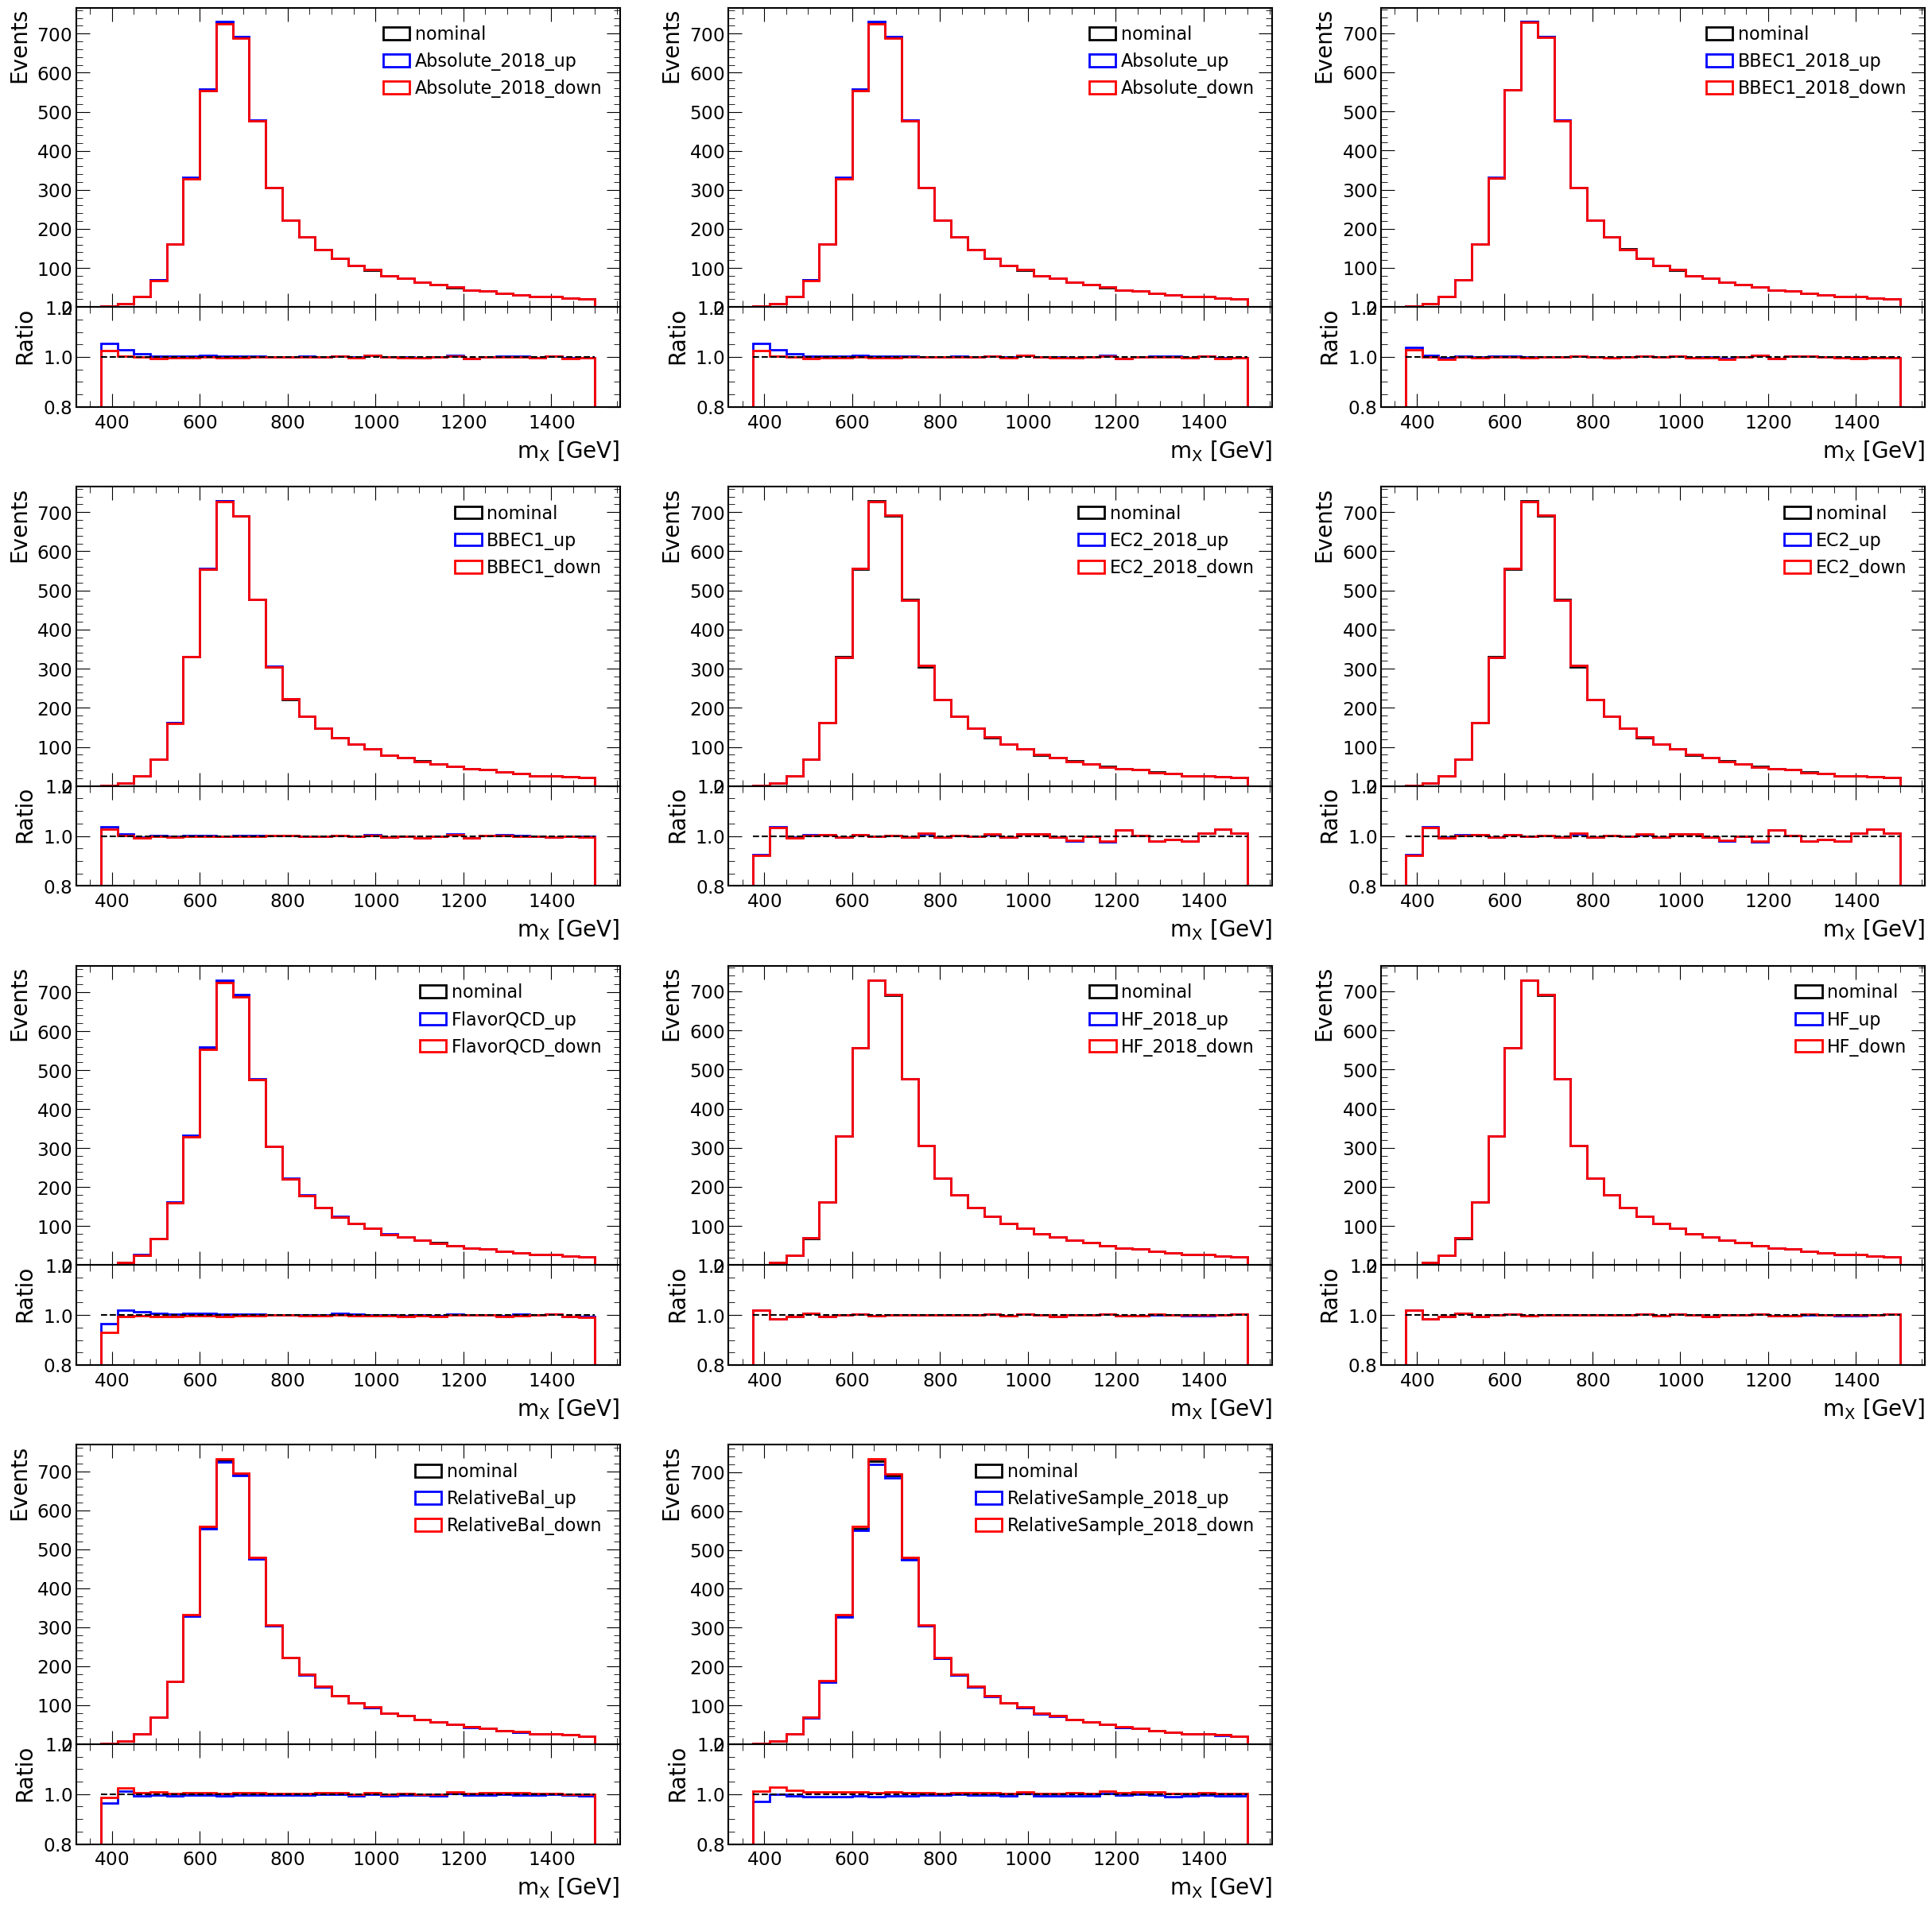

In [19]:
fig = plt.figure(figsize=(30,30))
gs = GridSpec(4, 3, figure=fig)

for sys,ss in zip(sys_list, gs):
    gs0 = GridSpecFromSubplotSpec(4, 1, subplot_spec=ss, hspace=0)

    ax1 = fig.add_subplot(gs0[:-1])
    ax2 = fig.add_subplot(gs0[-1], sharex=ax1)

    sys_up = sys_dict[sys].replace('X', 'up')
    sys_down = sys_dict[sys].replace('X', 'down')

    n = Hist(x, bins=mBins, weights=mx_dict['bSFshape_central'], ax=ax1, label='nominal', color='k')
    n_up = Hist(x, bins=mBins, weights=mx_dict[sys_up], ax=ax1, label=f"{sys}_up", color='b')
    n_down = Hist(x, bins=mBins, weights=mx_dict[sys_down], ax=ax1, label=f"{sys}_down", color='r')

    ratio_up = np.nan_to_num(n_up/n, 1.0)
    ratio_down = np.nan_to_num(n_down/n, 1.0)

    n_ratio_up = Hist(x, bins=mBins, weights=ratio_up, ax=ax2, color='b')
    n_ratio_down = Hist(x, bins=mBins, weights=ratio_down, ax=ax2, color='r')
    ax2.plot([375,1500], [1,1], 'k--')
    ax2.set_ylim(0.8,1.2)
    ax2.set_ylabel('Ratio')
    ax2.set_xlabel(r'$m_{X}$ [GeV]')
    ax1.set_ylabel('Events')
    ax1.legend()

# gs0 = GridSpecFromSubplotSpec(4, 1, subplot_spec=gs[-1], hspace=0)
# ax1 = fig.add_subplot(gs0[:-1])
# ax2 = fig.add_subplot(gs0[-1], sharex=ax1)
# n = Hist(x, bins=mBins, weights=mx_dict['nominal'], ax=ax1, label='nominal', color='k')
# n_c = Hist(x, bins=mBins, weights=mx_dict['bSFshape_central'], ax=ax1, label="central", color='b')
# ratio = np.nan_to_num(n_c/n, 1.0)
# n_ratio = Hist(x, bins=mBins, weights=ratio, ax=ax2, color='b')
# ax2.plot([375,1500], [1,1], 'k--')
# ax2.set_ylim(0.5,1.5)
# ax2.set_ylabel('Ratio')
# ax2.set_xlabel(r'$m_{X}$ [GeV]')
# ax1.set_ylabel('Events')
# ax1.legend()

fig.savefig('plots/systematics/up_down.pdf')

In [13]:
for sys,var in systematics:
    print(f"{sys}{var.capitalize()}")

Absolute_2018Down
Absolute_2018Up
AbsoluteDown
AbsoluteUp
BBEC1_2018Down
BBEC1_2018Up
BBEC1Down
BBEC1Up
EC2_2018Down
EC2_2018Up
EC2Down
EC2Up
FlavorQCDDown
FlavorQCDUp
HF_2018Down
HF_2018Up
HFDown
HFUp
RelativeBalDown
RelativeBalUp
RelativeSample_2018Down
RelativeSample_2018Up
TotalDown
TotalUp


In [26]:
nominal.asr_hs_mask.sum()*nominal.scale

713.7184786516854

In [1]:
import uproot
f = uproot.open("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8/ntuple.root")
t = f['sixBtree']
ttbar = uproot.open("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple.root")
ttbar = f['sixBtree']
tt_genWeight = ttbar['genWeight'].array()

In [4]:
t.keys()

['Run',
 'LumiSec',
 'Event',
 'n_other_pv',
 'rhofastjet_all',
 'PFHT',
 'triggerScaleFactor',
 'triggerDataEfficiency',
 'triggerMcEfficiency',
 'triggerScaleFactorUp',
 'triggerDataEfficiencyUp',
 'triggerMcEfficiencyUp',
 'triggerScaleFactorDown',
 'triggerDataEfficiencyDown',
 'triggerMcEfficiencyDown',
 'gen_X_fc_m',
 'gen_X_fc_pt',
 'gen_X_fc_eta',
 'gen_X_fc_phi',
 'gen_X_m',
 'gen_X_pt',
 'gen_X_eta',
 'gen_X_phi',
 'gen_Y_m',
 'gen_Y_pt',
 'gen_Y_eta',
 'gen_Y_phi',
 'gen_HX_m',
 'gen_HX_pt',
 'gen_HX_eta',
 'gen_HX_phi',
 'gen_H1_m',
 'gen_H1_pt',
 'gen_H1_eta',
 'gen_H1_phi',
 'gen_H2_m',
 'gen_H2_pt',
 'gen_H2_eta',
 'gen_H2_phi',
 'gen_HX_b1_m',
 'gen_HX_b1_pt',
 'gen_HX_b1_eta',
 'gen_HX_b1_phi',
 'gen_HX_b2_m',
 'gen_HX_b2_pt',
 'gen_HX_b2_eta',
 'gen_HX_b2_phi',
 'gen_H1_b1_m',
 'gen_H1_b1_pt',
 'gen_H1_b1_eta',
 'gen_H1_b1_phi',
 'gen_H1_b2_m',
 'gen_H1_b2_pt',
 'gen_H1_b2_eta',
 'gen_H1_b2_phi',
 'gen_H2_b1_m',
 'gen_H2_b1_pt',
 'gen_H2_b1_eta',
 'gen_H2_b1_phi',
 'g

In [13]:
import uproot
f = uproot.open("/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/output.root")
print(f.keys())
t = f['sixBtree']
t['genWeight'].array(), len(t['jet_btag'].array())

['h_cutflow;1', 'h_cutflow_unweighted;1', 'n_ele;1', 'n_mu;1', 'n_presel_jet;1', 'sixBtree;1', 'NormWeightTree;1']


(<Array [-5.52e+03, 5.52e+03, ..., -5.52e+03, 5.52e+03] type='116 * float32'>,
 116)

In [14]:
import uproot
f = uproot.open("/uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/MultiHiggs/analysis/MultiHAnalysis/output.root")
print(f.keys())
t = f['sixBtree']
t['genWeight'].array(), len(t['jet_btag'].array())

['h_cutflow;1', 'h_cutflow_unweighted;1', 'n_ele;1', 'n_mu;1', 'n_presel_jet;1', 'sixBtree;1', 'NormWeightTree;1']


(<Array [-5.52e+03, 5.52e+03, ..., -5.52e+03, 5.52e+03] type='116 * float32'>,
 116)

In [8]:
import uproot
f = uproot.open("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple.root")
t = f['sixBtree']
f['NormWeightTree'].keys()

[]

In [9]:
len(t['jet_btag'].array())

4544316

In [3]:
ttbar = Bkg("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple.root")
# tt_weight = ttbar.genWeight * ttbar.PUWeight * ttbar.triggerSF
# tt_pu_up = ttbar.genWeight * ttbar.PUWeight_up * ttbar.triggerSF
# tt_pu_down = ttbar.genWeight * ttbar.PUWeight_down * ttbar.triggerSF
# tt_trigger_up = ttbar.genWeight * ttbar.PUWeight * ttbar.triggerSF_up
# tt_trigger_down = ttbar.genWeight * ttbar.PUWeight * ttbar.triggerSF_down

tt_pu_up = ttbar.PUWeight_up
tt_pu_down = ttbar.PUWeight_down

KeyInFileError: not found: 'genWeight'

    Available keys: 'HEMWeight', 'PUIDWeight', 'n_genjet', 'genjet_E', 'genjet_m', 'Event', 'n_jet', 'genjet_pt', 'genpb_eta', 'lhe_ht', 'genjet_eta', 'genjet_phi', 'genpb_pt', 'Run', 'PFHT', 'PUIDWeight_up', 'X_eta', 'Y_eta'...

in file /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple.root
in object /sixBtree;1

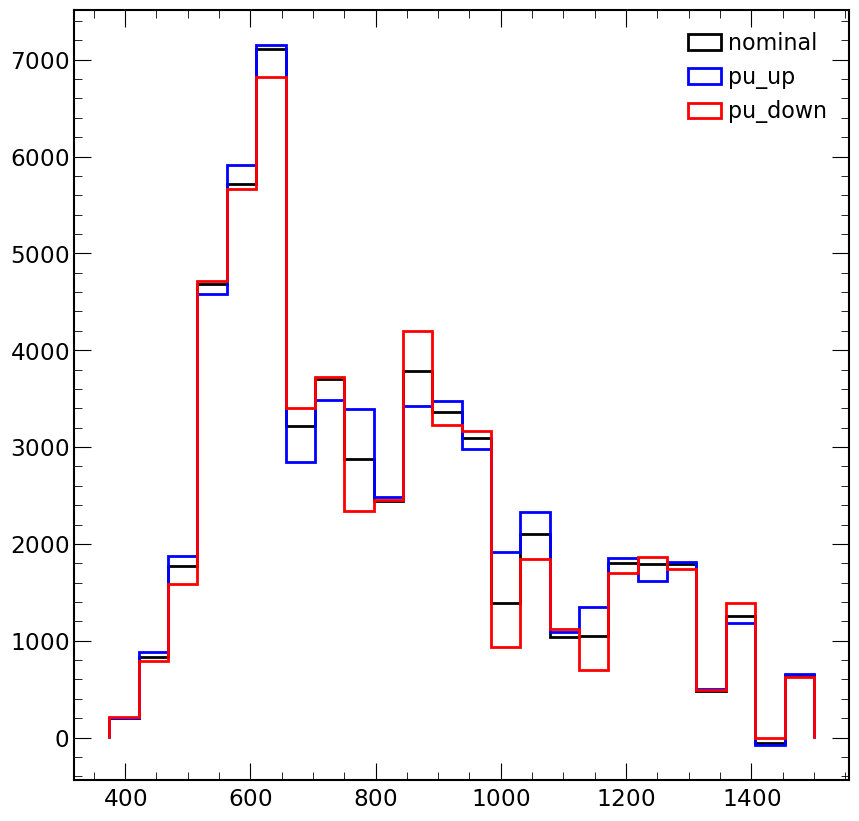

In [ ]:
fig, ax = plt.subplots()

n = Hist(ttbar.X.m, bins=np.linspace(375,1500,25), weights=tt_weight, ax=ax, label='nominal', color='k')
n_pu_up = Hist(ttbar.X.m, bins=np.linspace(375,1500,25), weights=tt_pu_up, ax=ax, label='pu_up', color='b')
n_pu_down = Hist(ttbar.X.m, bins=np.linspace(375,1500,25), weights=tt_pu_down, ax=ax, label='pu_down', color='r')

In [3]:
import uproot
f = uproot.open("combine/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/MX_850_MY_350.root")
f.keys()

['signal;1',
 'signal_TriggerUp;1',
 'signal_TriggerDown;1',
 'signal_PileupUp;1',
 'signal_PileupDown;1',
 'signal_BTagHFUp;1',
 'signal_BTagHFDown;1',
 'signal_BTagLFUp;1',
 'signal_BTagLFDown;1',
 'signal_BTagHFStats1Up;1',
 'signal_BTagHFStats1Down;1',
 'signal_BTagHFStats2Up;1',
 'signal_BTagHFStats2Down;1',
 'signal_BTagLFStats1Up;1',
 'signal_BTagLFStats1Down;1',
 'signal_BTagLFStats2Up;1',
 'signal_BTagLFStats2Down;1']

In [5]:
n, bins = f['signal'].to_numpy()
n_trig_up = f['signal_TriggerUp'].to_numpy()[0]
n_trig_down = f['signal_TriggerDown'].to_numpy()[0]
n_pu_up = f['signal_PileupUp'].to_numpy()[0]
n_pu_down = f['signal_PileupDown'].to_numpy()[0]
n_hf_up = f['signal_BTagHFUp'].to_numpy()[0]
n_hf_down = f['signal_BTagHFDown'].to_numpy()[0]
n_hfstats1_up = f['signal_BTagHFStats1Up'].to_numpy()[0]
n_hfstats1_down = f['signal_BTagHFStats1Down'].to_numpy()[0]
n_hfstats2_up = f['signal_BTagHFStats2Up'].to_numpy()[0]
n_hfstats2_down = f['signal_BTagHFStats2Down'].to_numpy()[0]
n_lf_up = f['signal_BTagLFUp'].to_numpy()[0]
n_lf_down = f['signal_BTagLFDown'].to_numpy()[0]
n_lfstats1_up = f['signal_BTagLFStats1Up'].to_numpy()[0]
n_lfstats1_down = f['signal_BTagLFStats1Down'].to_numpy()[0]
n_lfstats2_up = f['signal_BTagLFStats2Up'].to_numpy()[0]
n_lfstats2_down = f['signal_BTagLFStats2Down'].to_numpy()[0]
x = (bins[1:] + bins[:-1])/2

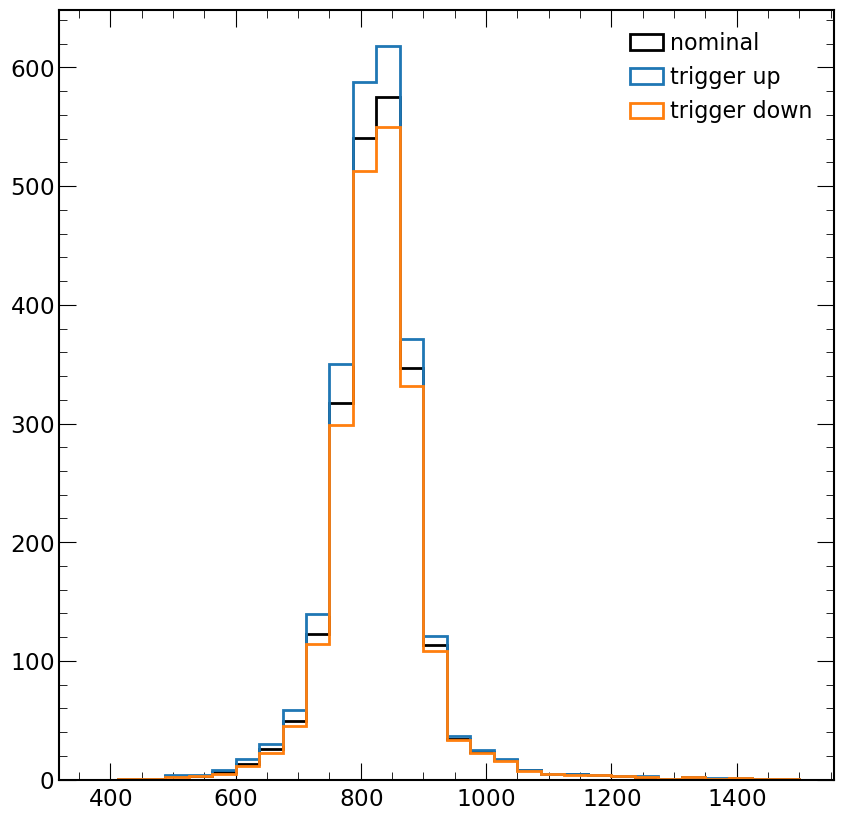

In [6]:
fig, ax = plt.subplots()

n = Hist(x, bins=bins, weights=n, ax=ax, label='nominal', color='k')
n = Hist(x, bins=bins, weights=n_trig_up, ax=ax, label="trigger up", color='C0')
n = Hist(x, bins=bins, weights=n_trig_down, ax=ax, label="trigger down", color='C1')

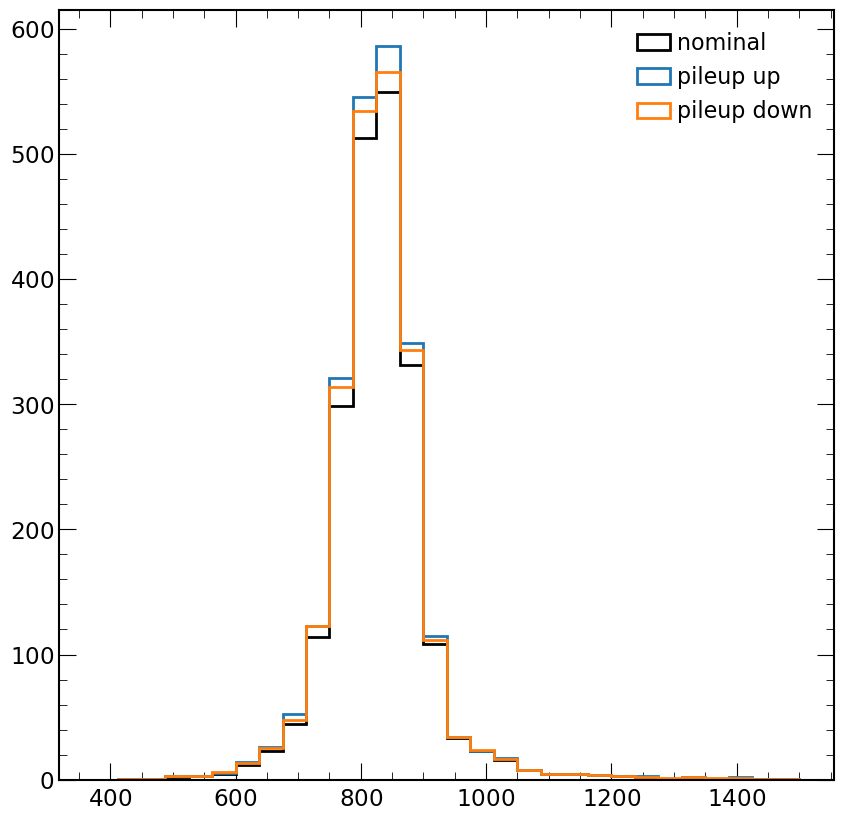

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=(20,10))

n = Hist(x, bins=bins, weights=n, ax=ax, label='nominal', color='k')
n = Hist(x, bins=bins, weights=n_pu_up, ax=ax, label="pileup up", color='C0')
n = Hist(x, bins=bins, weights=n_pu_down, ax=ax, label="pileup down", color='C1')



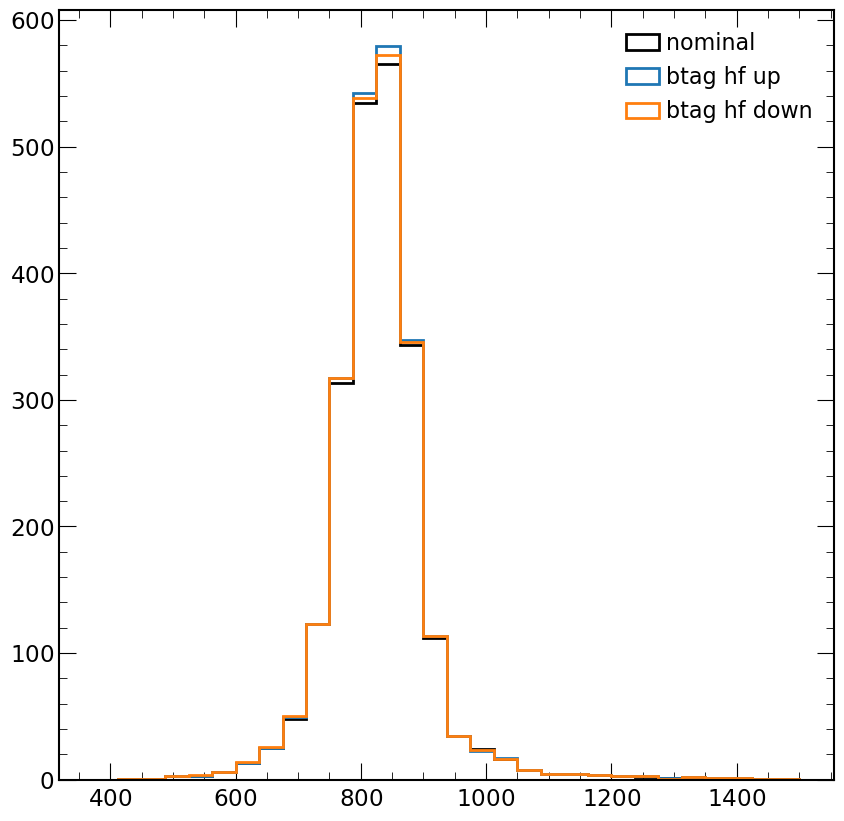

In [8]:
fig, ax = plt.subplots()

n = Hist(x, bins=bins, weights=n, ax=ax, label='nominal', color='k')
n = Hist(x, bins=bins, weights=n_hf_up, ax=ax, label="btag hf up", color='C0')
n = Hist(x, bins=bins, weights=n_hf_down, ax=ax, label="btag hf down", color='C1')

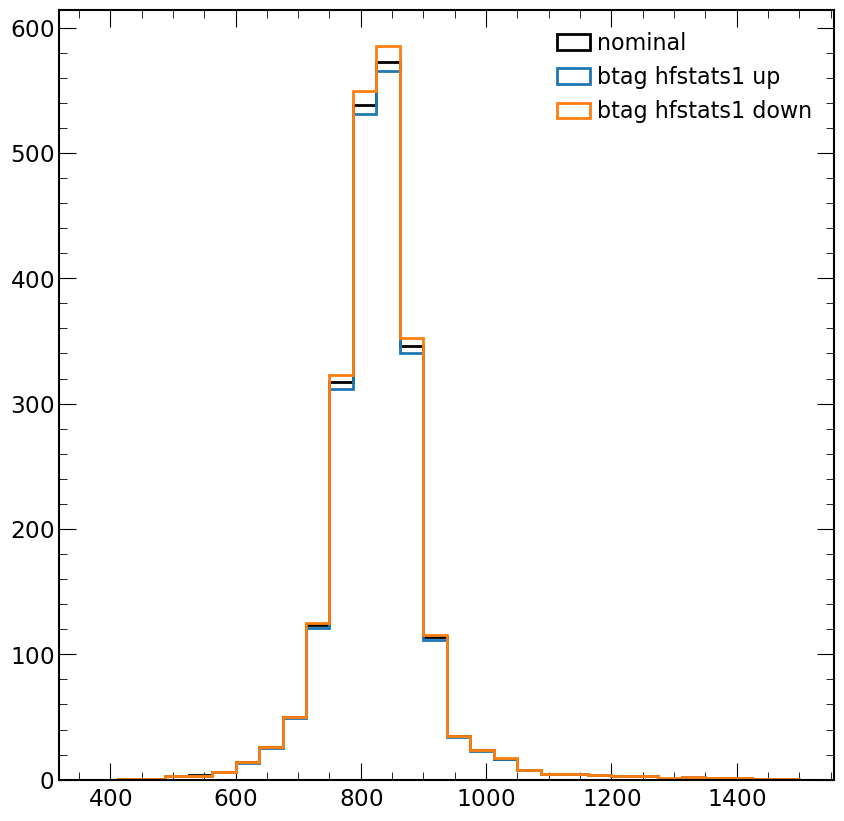

In [9]:
fig, ax = plt.subplots()

n = Hist(x, bins=bins, weights=n, ax=ax, label='nominal', color='k')
n = Hist(x, bins=bins, weights=n_hfstats1_up, ax=ax, label="btag hfstats1 up", color='C0')
n = Hist(x, bins=bins, weights=n_hfstats1_down, ax=ax, label="btag hfstats1 down", color='C1')

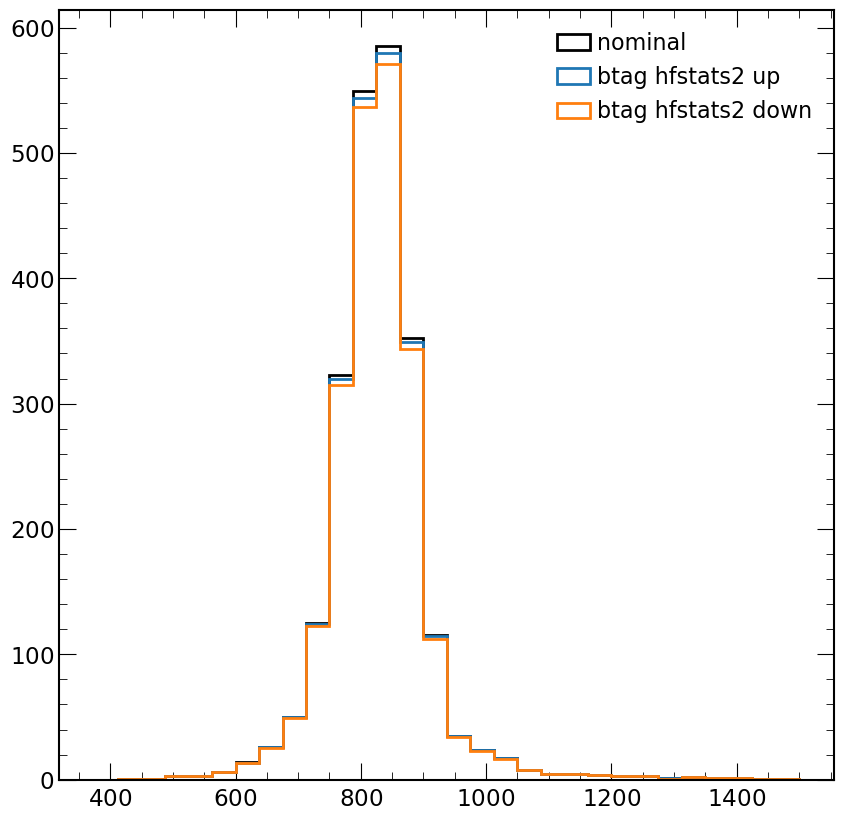

In [10]:
fig, ax = plt.subplots()

n = Hist(x, bins=bins, weights=n, ax=ax, label='nominal', color='k')
n = Hist(x, bins=bins, weights=n_hfstats2_up, ax=ax, label="btag hfstats2 up", color='C0')
n = Hist(x, bins=bins, weights=n_hfstats2_down, ax=ax, label="btag hfstats2 down", color='C1')